In [4]:
import turtle as t, numpy as np, matplotlib.pyplot as plt
import logging as lg

WHITE: tuple[int] = (1, 1, 1)
BLACK: tuple[int] = (0, 0, 0)
RED: tuple[int] = (1, 0, 0)
BLUE: tuple[int] = (0, 0, 1)
GREEN: tuple[int] = (0, 1, 0)

In [5]:
from typing import TypeAlias, Union
number: TypeAlias = Union[int, float]

In [6]:
def map(x: number,
        oldmin: number, oldmax: number,
        newmin: number, newmax: number) -> float:
    return (x - oldmin) / (oldmax - oldmin) * (newmax - newmin) + newmin

def MandelbrotConverge(c: complex, x: tuple[number], y: tuple[number],
                       newx: tuple[number] = (-2, 2), newy: tuple[number] = (-2, 2), *,
                       max_iter: int = 100, power: float | int = 2, smooth: bool = False) -> int:
    c: complex = complex(map(c.real, x[0], x[1], newx[0], newx[1]),
                         map(c.imag, y[0], y[1], newy[0], newy[1]))
    z: complex = c
    n: int = -1
    while (n := n + 1) < max_iter:
        if abs(z) > 2: break
        z = z ** power + c

    if smooth:
        n -= np.log(max(np.log(abs(z)), 1) * max_iter) / np.log(power)
    return n
def JuliaConverge(z: complex, c: complex, x: tuple[number], y: tuple[number],
                  newx: tuple[number] = (-2, 2), newy: tuple[number] = (-2, 2),
                  *, max_iter: int = 100, power: float | int = 2, smooth: bool = False) -> int:
    z: complex = complex(map(z.real, x[0], x[1], newx[0], newx[1]),
                         map(z.imag, y[0], y[1], newy[0], newy[1]))
    n: int = -1
    escape_bound: float = max([abs(i) for i in newx]) ** 2 + max([abs(i) for i in newy]) ** 2
    smoothcolor: float = np.exp(-abs(z))
    while (n := n + 1) < max_iter:
        if (modulus := abs(z)) >= escape_bound: break
        z = z ** power + c
        if smooth:
            smoothcolor += np.exp(-modulus)
    
    return smoothcolor if smooth else n

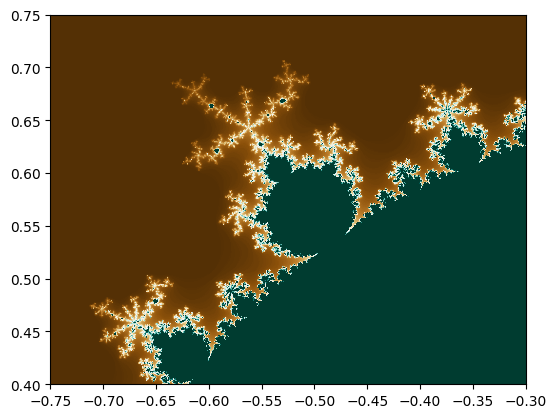

In [13]:
points: int = 500
# x_int: tuple[float] = (-1.7, 1.7)
# y_int: tuple[float] = (-1, 1)
x_int = (-0.75, -0.3)
y_int = (0.4, 0.75)
JuliasConstant: complex = -0.8 + 0.156j
x: np.ndarray = np.linspace(*x_int, num=points)
y: np.ndarray = np.linspace(*y_int, num=points)
gradient: np.ndarray = np.zeros((points, points))
for i, numx in enumerate(x):
    for j, numy in enumerate(y):
        gradient[j][i] = MandelbrotConverge(complex(numx, numy), x_int, y_int, x_int, y_int,
                                            max_iter=1000, smooth=True)
        # gradient[j][i] = JuliaConverge(complex(numx, numy), JuliasConstant, x_int, y_int, x_int, y_int,
        #                                max_iter=500, smooth=True)
mandelbrot = plt.imshow(gradient, cmap='BrBG', vmin=0, vmax=100,
                        extent=[x_int[0], x_int[1], y_int[0], y_int[1]], origin='lower')
# plt.axis('off')
plt.show()
# plt.savefig("Julia's Set at -0.8 + 0.156i.png", bbox_inches='tight', pad_inches=0)